### Downtream analysis
_Single cell RNA Sequencing Identifies G-protein Coupled Receptor 87 as a Novel Basal Cell Marker of Distal Honeycomb Cysts in IPF_  
Katharina Heinzelmann, Qianjiang Hu, Yan Hu, et al. and Mareike Lehmann, Melanie Königshoff

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import diffxpy.api as de
import random
import scipy.sparse as sparse
from scipy import stats
from gprofiler import GProfiler
# costome codes
import ma_codes as codes
from ma_codes import mysize, mymap

In [2]:
#pretty plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
# define a color map
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

### Set project file paths

In [3]:
## Set Filepaths
dge_path = "./ipf/data/"
out_folder = "./ipf/output/"
object_folder = "./ipf/object/"

### Read Object

In [4]:
adata = sc.read(object_folder + "211018_denver_ipf_GPR87_annotated.h5ad")

#### Figure A

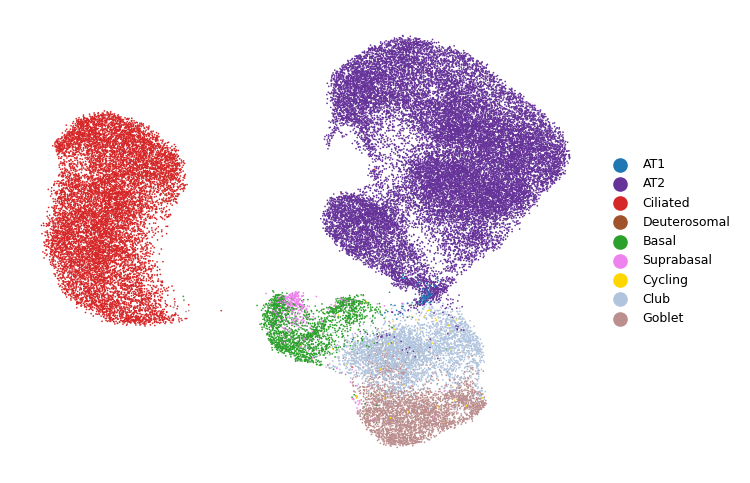

In [5]:
sc.pl.umap(adata, color = "cell_type", ax = plt.figure(figsize=(5, 4), dpi= 150).gca(),
          legend_fontsize = 6, frameon = False, title = '')

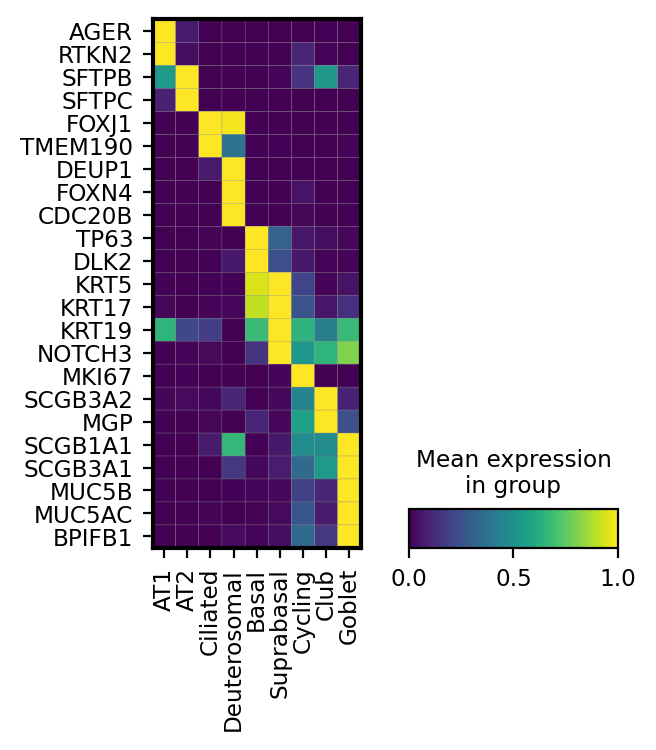

In [6]:
marker = ["AGER", "RTKN2", "SFTPB", "SFTPC", "FOXJ1", "TMEM190", "DEUP1", "FOXN4", "CDC20B",
          "TP63", "DLK2", "KRT5", "KRT17", "KRT19", "NOTCH3", "MKI67", "SCGB3A2", "MGP", "SCGB1A1", 
          "SCGB3A1", "MUC5B", "MUC5AC", "BPIFB1"]
sc.pl.matrixplot(adata, var_names = marker, groupby = "cell_type", 
                 standard_scale = "var", swap_axes = True,figsize=(3,3.5))

#### Figure B

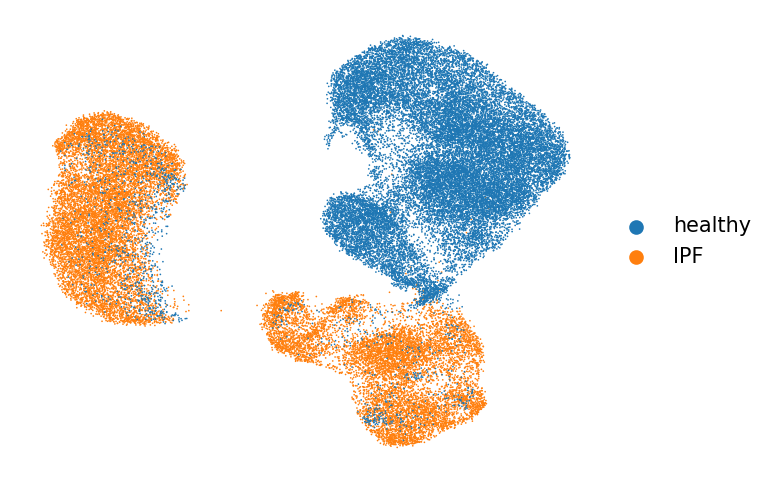

In [7]:
sc.pl.umap(adata, color = "health_status", ax = plt.figure(figsize=(5, 4), dpi= 150).gca(),
          legend_fontsize = 10, frameon = False, title = '')

#### Figure C

##### Differential Gene Expression Analysis

In [8]:
sample1=random.sample(range(0,adata.n_obs),10000)
adata_sub = adata[sample1, :]
print('Sample Size:\n%s '%(adata_sub.obs.groupby('health_status').size()))
print('%s \nCategories: \n%s'%('*'*10, adata_sub.obs['health_status'].cat.categories))

Sample Size:
health_status
healthy    5796
IPF        4204
dtype: int64 
********** 
Categories: 
Index(['healthy', 'IPF'], dtype='object')


In [9]:
test_sf = de.test.wald(
    data=adata_sub.layers['counts'],
    formula_loc="~ 1 + health_status + size_factors",
    factor_loc_totest="health_status",
    as_numeric=['size_factors'],
    gene_names=adata_sub.var_names,
    sample_description=adata_sub.obs
)
de = test_sf.summary()

/home/qianjianghu/miniconda3/lib/python3.7/site-packages/numba/core/dispatcher.py:303: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  entrypoints.init_all()
/home/qianjianghu/miniconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/qianjianghu/miniconda3/lib/python3.7/site-packages/batchglm/models/base_glm/utils.py:159: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  for g in np.unique(grouping)
/home/qianjianghu/miniconda3/lib/python3.7/site-packages/b

training location model: True
training scale model: True
iter   0: ll=67921322.772580
iter   1: ll=65382689.177709, converged: 0.00% (loc: 2.45%, scale update: False), in 29.22sec
iter   2: ll=64814232.981100, converged: 0.00% (loc: 22.02%, scale update: False), in 28.89sec
iter   3: ll=64705152.356025, converged: 0.00% (loc: 22.11%, scale update: False), in 22.98sec
iter   4: ll=64673082.367757, converged: 0.00% (loc: 26.42%, scale update: False), in 22.99sec
iter   5: ll=64660544.352469, converged: 0.00% (loc: 57.75%, scale update: False), in 21.61sec
iter   6: ll=47446792.503077, converged: 2.36% (loc: 2.36%, scale update: True), in 181.56sec
iter   7: ll=47435998.473736, converged: 2.36% (loc: 11.83%, scale update: False), in 27.21sec
iter   8: ll=47433140.041685, converged: 2.36% (loc: 32.68%, scale update: False), in 25.01sec
iter   9: ll=47432216.779883, converged: 2.36% (loc: 66.55%, scale update: False), in 19.59sec
iter  10: ll=47431977.920672, converged: 2.36% (loc: 81.77%, 

iter  79: ll=47026672.612069, converged: 99.92% (loc: 99.93%, scale update: False), in 0.31sec
iter  80: ll=47026672.611926, converged: 99.92% (loc: 99.95%, scale update: False), in 0.31sec
iter  81: ll=47026672.611803, converged: 99.92% (loc: 99.96%, scale update: False), in 0.27sec
iter  82: ll=47026672.611679, converged: 99.92% (loc: 99.98%, scale update: False), in 0.25sec
iter  83: ll=47026672.611573, converged: 99.92% (loc: 99.99%, scale update: False), in 0.23sec
iter  84: ll=47026672.611541, converged: 99.93% (loc: 99.93%, scale update: True), in 7.84sec
iter  85: ll=47026672.611428, converged: 99.93% (loc: 99.95%, scale update: False), in 0.31sec
iter  86: ll=47026672.611336, converged: 99.93% (loc: 99.96%, scale update: False), in 0.27sec
iter  87: ll=47026672.611244, converged: 99.93% (loc: 99.97%, scale update: False), in 0.26sec
iter  88: ll=47026672.611164, converged: 99.93% (loc: 99.98%, scale update: False), in 0.22sec
iter  89: ll=47026672.611084, converged: 99.93% (lo

iter 166: ll=47026672.609992, converged: 99.99% (loc: 99.99%, scale update: False), in 0.19sec
iter 167: ll=47026672.609991, converged: 99.99% (loc: 99.99%, scale update: False), in 0.21sec
iter 168: ll=47026672.609991, converged: 99.99% (loc: 99.99%, scale update: True), in 0.28sec
iter 169: ll=47026672.609990, converged: 99.99% (loc: 99.99%, scale update: False), in 0.24sec
iter 170: ll=47026672.609989, converged: 99.99% (loc: 99.99%, scale update: False), in 0.19sec
iter 171: ll=47026672.609989, converged: 99.99% (loc: 99.99%, scale update: False), in 0.19sec
iter 172: ll=47026672.609988, converged: 99.99% (loc: 100.00%, scale update: False), in 0.24sec
iter 173: ll=47026672.609988, converged: 99.99% (loc: 99.99%, scale update: True), in 0.28sec
iter 174: ll=47026672.609988, converged: 99.99% (loc: 100.00%, scale update: False), in 0.23sec
iter 175: ll=47026672.609988, converged: 99.99% (loc: 99.99%, scale update: True), in 0.28sec
iter 176: ll=47026672.609987, converged: 99.99% (lo

/home/qianjianghu/miniconda3/lib/python3.7/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [10]:
de.to_csv(out_folder + "DEG_whole_oldvsIPF_MKcorhort_noCycleRegr.csv", header=True, index=False, sep=',', mode='w')

In [ ]:
# go to R to do plot Fig C

#### Figure D

In [11]:
# define function to detect genes which are all upregulated in IPF and exclude the ones highly expressed only in individuals
def rhy_up(ad, genes, keys, thres=0, thr = 1, thr_FC = 1.5, use_raw=False):
    import warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    ls =[]
    genes = [i for i in genes if i in ad.var_names.to_list()]
    for gene in genes:
        #print('checking %s' %(gene))

        genedf = sc.get.obs_df(ad, keys=[*keys, *[gene]], use_raw=use_raw)
        grouped = genedf.groupby(keys, observed=True)

        exp = grouped.agg(lambda x: np.nanmean(x[x>thres])).fillna(0)
        percent = grouped.agg(lambda x: np.mean(x>thres)*100).fillna(0)

        percent = percent.reset_index().melt(id_vars=keys, value_name='pct', var_name='gene')
        exp = exp.reset_index().melt(id_vars=keys, value_name='avg', var_name='gene')
        df = percent.merge(exp)
        df = df.set_index(df.columns[0])
        df['expr'] = df['pct']*df['avg']
        mIPF = df.loc[['IPF-1','IPF-2','IPF-3'],'expr'].mean()
        mctr = df.loc[['Control-1','Control-2','Control-3'],'expr'].mean()
        if df.loc[['IPF-1','IPF-2','IPF-3'],'expr'].min() > df.loc[['Control-1','Control-2','Control-3'],'expr'].max() and mIPF/mctr > thr_FC:
            ls.append(gene)
            
    return ls

In [12]:
de = de.loc[de['mean']>0.01]
deg_up = de.loc[np.logical_and(de['log2fc']>0.5,de['qval']<0.05),'gene'].values
figc_tsr = [i for i in deg_up if i in tsr]
figc_tsr_rhy = rhy_up(adata[adata.obs.cell_type.isin(['Basal', 'Suprabasal'])].copy(), figc_tsr, keys= ['patient_id'],
             thr = 1, thr_FC = 1.5)

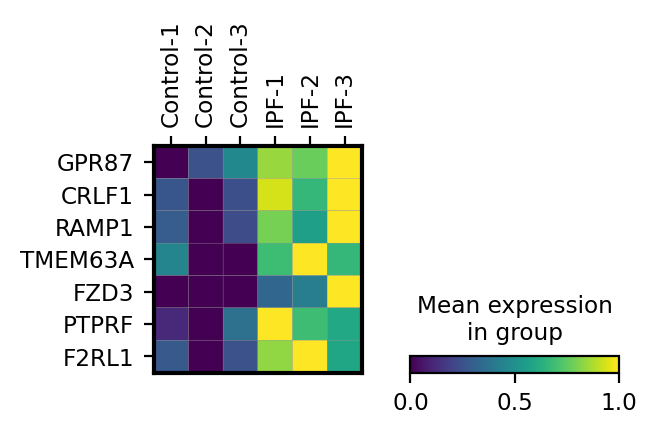

In [13]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False

sc.pl.matrixplot(adata[adata.obs.cell_type.isin(['Basal', 'Suprabasal'])].copy(),
                 var_names = figc_tsr_rhy, groupby = 'patient_id', swap_axes = True,
                 standard_scale = "var",figsize=(3,1.5))

#### Figure E

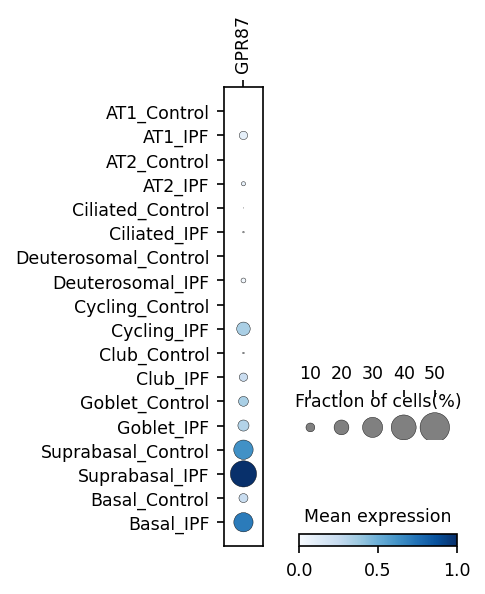

In [14]:
sc.pl.dotplot(adata,
              ['GPR87'], groupby = 'cell_type_disease', color_map = 'Blues', standard_scale='var',
             colorbar_title='Mean expression', size_title='Fraction of cells(%)',
             ax = plt.figure(figsize=(2, 4.7), dpi= 150).gca(),
             title = "")

#### Figure L

##### GPR87 Corelation Gene Analysis

In [15]:
sub = adata.copy()
sc.pp.pca(sub)
sc.pp.neighbors(sub, n_pcs = 30, n_neighbors = 20)
sc.tl.leiden(sub, resolution = 10, key_added = "overcluster")
print(len(np.unique(sub.obs.overcluster)))
sc.pp.filter_genes(sub, min_cells = 500)

115


In [16]:
corr_gene = "GPR87"
sub.X = sub.X.toarray()
genExp = codes.generate_expr_table(sub, xlabel = "overcluster", use_raw = False)
genExp.drop("identifier", inplace = True, axis = 1)
## Mean expression table
meanExp = genExp.groupby(["overcluster"]).mean().reset_index()
meanExp.set_index("overcluster", inplace = True)
print(meanExp.shape)

(115, 11311)


In [17]:
## correlation table
genename = meanExp.columns.tolist()
# generate correlation coefficient of each genes with target genes by 'scipy.spearmanr()'
result =pd.DataFrame(columns = ('genes','spearman_corr', 'pvalue'))
for i in genename:
    rho, pval = stats.spearmanr(meanExp[i], meanExp[corr_gene])
    result=result.append(pd.DataFrame({'genes':[i],'spearman_corr':[rho],'pvalue':[pval]}),ignore_index=True)

In [18]:
# sort table by column of "spearman_corr"
cors = result.sort_values(by="spearman_corr" , ascending=False)
cors = cors.dropna(axis=0, how='any')
cors.reset_index()
cors.set_index("genes", inplace = True)
cors.index.names = ['']

In [19]:
## save correlation table
cors.to_csv(out_folder + "%s_correlation_oldIPF.txt" %corr_gene, sep = "\t")

##### Gene Functional Annotation Enrichment Analysis

In [20]:
gp = GProfiler(return_dataframe=True, user_agent='g:GOSt')
bg_genes = adata.var_names.tolist()
pos_cor_enrichment = gp.profile(organism='hsapiens', sources=['GO:BP'], user_threshold=0.05,
                               significance_threshold_method='fdr', 
                               background=bg_genes, 
                               query=cors.index.tolist()[:400])
pos_cor_enrich_results = pos_cor_enrichment.set_index('native').sort_values('p_value').iloc[:,[2,5,7,10,1]]

In [21]:
## save enrichment table
pos_cor_enrich_results.to_csv(out_folder + "/enrichment_GPR87_positive_corrGenes_old_IPF.txt", sep = "\t")

In [ ]:
# go to R to do plot Fig L